In [1]:
import pymc as pm
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')
plt.style.use('default')

WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# we have two dices and we want to assess whether or not they are balanced the same way
# https://en.wikipedia.org/wiki/Multinomial_distribution
# https://stackoverflow.com/questions/25392831/comparing-two-biased-coins-newbie-example-from-kruschke-book
# https://stackoverflow.com/questions/46454814/how-to-simulate-a-biased-6-sided-dice-using-pymc3

In [5]:
data = [['Not bad', 0]]*8 + [['Not bad', 1]]*100 + [['Bad', 0]]*10 + [['Not bad', 1]]*100# + [['C', 0]]*6 + [['C', 1]]*6
data = pd.DataFrame(data, columns=['name', 'anomalous'])
table = pd.crosstab(index=data['name'], columns=data['anomalous'])
# table = table / table.min().min()
table

anomalous,0,1
name,,
Bad,10,0
Not bad,8,200


In [6]:
observations_1 = table[0]
observations_2 = table[1]

In [7]:
with pm.Model() as model:
    theta_1 = pm.Dirichlet('theta_1', a=np.ones(len(observations_1)))  # flat prior
    count_1 = pm.Multinomial('count_1', n=np.sum(observations_1), p=theta_1, observed=observations_1)
    theta_2 = pm.Dirichlet('theta_2', a=np.ones(len(observations_2)))  # flat prior
    count_2 = pm.Multinomial('count_2', n=np.sum(observations_2), p=theta_2, observed=observations_2)


    d = pm.Deterministic('theta_1-theta_2', theta_1-theta_2)

    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_1, theta_2]
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 22 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


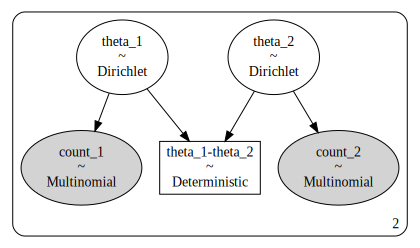

In [8]:
pm.model_to_graphviz(model)

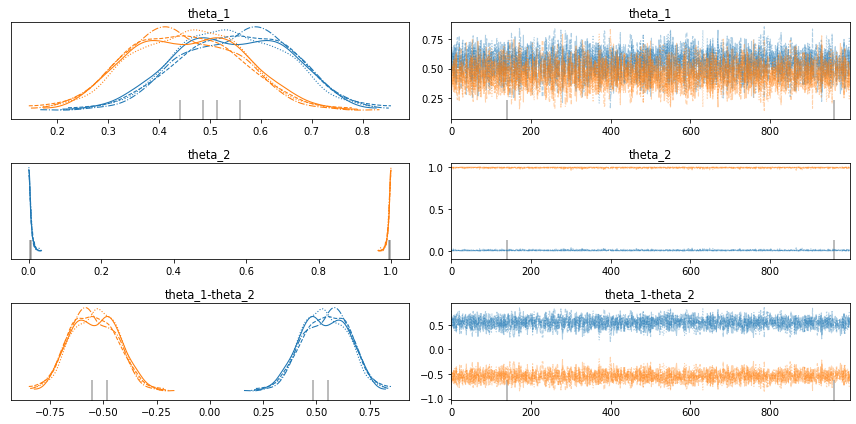

In [9]:
with model:
    axes_arr = az.plot_trace(trace)
plt.tight_layout()
plt.draw()

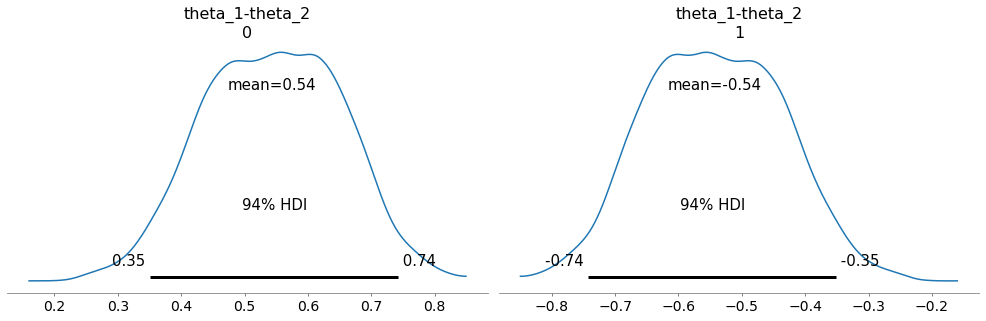

In [10]:
with model:
    az.plot_posterior(trace, var_names='theta_1-theta_2')
plt.tight_layout()
plt.draw()

# Binary case

In [11]:
data = [['A', 0]]*8 + [['A', 1]]*100 + [['B', 0]]*10 + [['B', 1]]*100
data = pd.DataFrame(data, columns=['name', 'anomalous'])
table = data

In [12]:
with pm.Model() as model_binary:
    theta_1 = pm.Beta('theta_1', 7, 7)  # prior
    count_1 = pm.Bernoulli('count_1', p=theta_1, observed=table.loc[table['name']=='A', 'anomalous'].values)
    theta_2 = pm.Beta('theta_2', 7, 7)  # prior
    count_2 = pm.Bernoulli('count_2', p=theta_2, observed=table.loc[table['name']=='B', 'anomalous'].values)

    d = pm.Deterministic('theta_1-theta_2', theta_1-theta_2)

    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_1, theta_2]
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.


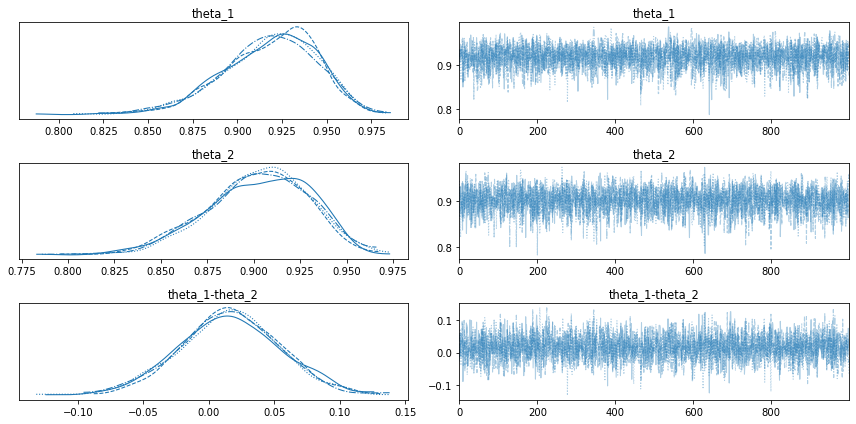

In [19]:
with model_binary:
    axes_arr = az.plot_trace(trace)
plt.tight_layout()
plt.draw()